## **Import Data & Basic EDA**

#### Basic Time Series EDA

In [184]:
import pandas as pd

# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])

df=df.rename(columns = {'value':'sales'})
df.head()



,sales
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


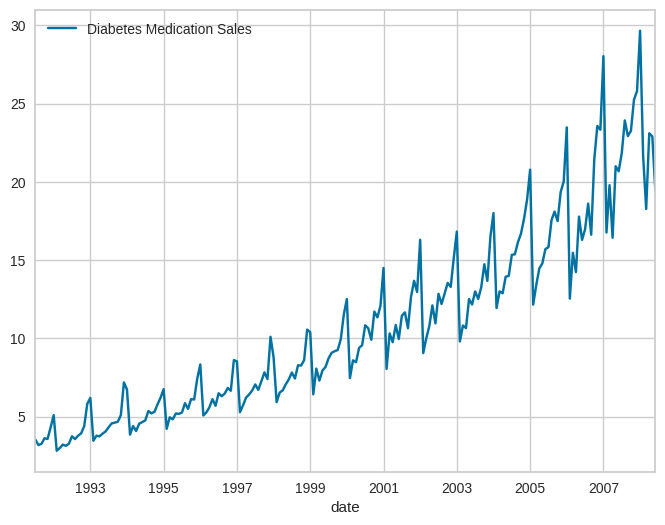

In [185]:
import matplotlib.pyplot as plt

df['sales'].plot(figsize=(8,6),label='Diabetes Medication Sales')
plt.legend();

In [186]:
df.describe()

,sales
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


This description of our data is fairly meaningless as our data is non-stationary

We can split our data into Training / Testing splits - we do this in the Automated model below as well.

In [187]:
size = int(len(df)*0.90)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
print(len(df_train), len(df_test))

183 21


In [188]:
print("Training data ends on...", df_train.tail(1))

Training data ends on...                 sales
date                 
2006-09-01  16.623343


In [189]:
print('Test data starts on...', df_test.head(1))

Test data starts on...                 sales
date                 
2006-10-01  21.430241


#### Test for Stationarity & Differencing

We can conduct a Dickey-Fuller test for stationarity - this informs us if we need to apply differencing to out data before fitting a model.

In [190]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

import warnings
warnings.filterwarnings("ignore")

In [191]:
# Dickey Fuller Test for Stationarity
result = sts.adfuller(df['sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

print('-------------------')
if result[1] > 0.05:
  print('Fail to reject the null. Data has a unit root and is non-stationary')
else:
  print('Reject the null hypothesis. Data does not have a unit root and is stationary.')

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
-------------------
Fail to reject the null. Data has a unit root and is non-stationary


            sales
count  203.000000
mean     0.078350
std      2.242070
min    -11.274514
25%     -0.188412
50%      0.335863
75%      0.964731
max      4.842732


Text(0.5, 1.0, 'Sales MoM')

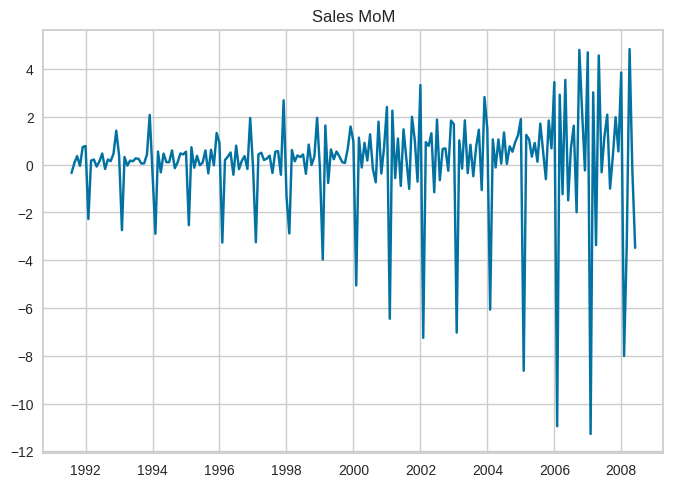

In [192]:
# here we apply the differencing function in pandas to obtain a differenced dataset

df_diff = df.diff()
df_diff = df_diff.iloc[1:]
print(df_diff.describe())

plt.plot(df_diff)
plt.title('Sales MoM')

In [193]:
df_diff.head()

,sales
date,
1991-08-01,-0.345700
1991-09-01,0.071330
1991-10-01,0.358782
1991-11-01,-0.045134
1991-12-01,0.740502


In [194]:
result = sts.adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

print('-------------------')
if result[1] > 0.05:
  print('Fail to reject the null. Data has a unit root and is non-stationary')
else:
  print('Reject the null hypothesis. Data does not have a unit root and is stationary.')

ADF Statistic: -2.495172
p-value: 0.116653
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
-------------------
Fail to reject the null. Data has a unit root and is non-stationary


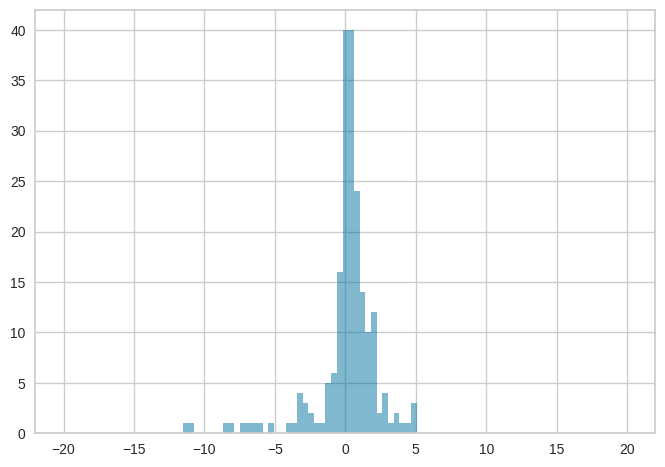

In [195]:
import numpy as np
bins = np.linspace(-20, 20, 100)

plt.hist(df_diff['sales'], bins, alpha=0.5);

## **Basic ARIMA**

#### Several ARIMA models - Manual Set-Up

In [196]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

import warnings
warnings.filterwarnings("ignore")

In [197]:
from statsmodels.tsa.arima.model import ARIMA

model_AR = ARIMA(df_diff['sales'], order=(1,0,0))
# modelled on differenced data
results_AR = model_AR.fit()
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  203
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -436.793
Date:                Wed, 05 Jul 2023   AIC                            879.586
Time:                        14:43:34   BIC                            889.526
Sample:                    08-01-1991   HQIC                           883.608
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.148      0.566      0.571      -0.206       0.373
ar.L1         -0.3680      0.052     -7.093      0.000      -0.470      -0.266
sigma2         4.3266      0.326     13.259      0.000       3.687       4.966
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):               453.34
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               8.83   Skew:                            -1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
model_AR_nd = ARIMA(df['sales'], order=(1,0,0))
# modelled on non-differenced data
results_AR_nd = model_AR_nd.fit()
results_AR_nd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  204
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -451.486
Date:                Wed, 05 Jul 2023   AIC                            908.972
Time:                        14:43:34   BIC                            918.927
Sample:                    07-01-1991   HQIC                           912.999
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7881      2.858      3.774      0.000       5.186      16.391
ar.L1          0.9323      0.024     39.475      0.000       0.886       0.979
sigma2         4.8476      0.326     14.892      0.000       4.210       5.486
===================================================================================
Ljung-Box (L1) (Q):                  20.33   Jarque-Bera (JB):               342.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.73   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [199]:
model_AR2 = ARIMA(df_diff['sales'], order=(3,0,0))
results_AR2 = model_AR2.fit()
results_AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  203
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -431.199
Date:                Wed, 05 Jul 2023   AIC                            872.399
Time:                        14:43:34   BIC                            888.965
Sample:                    08-01-1991   HQIC                           879.101
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0853      0.113      0.755      0.450      -0.136       0.307
ar.L1         -0.4482      0.056     -7.940      0.000      -0.559      -0.338
ar.L2         -0.2263      0.073     -3.110      0.002      -0.369      -0.084
ar.L3         -0.1802      0.090     -1.998      0.046      -0.357      -0.003
sigma2         4.0917      0.291     14.081      0.000       3.522       4.661
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               304.99
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               9.33   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  203
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -436.793
Date:                Wed, 05 Jul 2023   AIC                            879.586
Time:                        14:43:34   BIC                            889.526
Sample:                    08-01-1991   HQIC                           883.608
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.148      0.566      0.571      -0.206       0.373
ar.L1         -0.3680      0.052     -7.093      0.000      -0.470      -0.266
sigma2         4.3266      0.326     13.259      0.0

In [201]:
print(results_AR_nd.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  204
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -451.486
Date:                Wed, 05 Jul 2023   AIC                            908.972
Time:                        14:43:34   BIC                            918.927
Sample:                    07-01-1991   HQIC                           912.999
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7881      2.858      3.774      0.000       5.186      16.391
ar.L1          0.9323      0.024     39.475      0.000       0.886       0.979
sigma2         4.8476      0.326     14.892      0.0

In [202]:
print(results_AR2.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  203
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -431.199
Date:                Wed, 05 Jul 2023   AIC                            872.399
Time:                        14:43:34   BIC                            888.965
Sample:                    08-01-1991   HQIC                           879.101
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0853      0.113      0.755      0.450      -0.136       0.307
ar.L1         -0.4482      0.056     -7.940      0.000      -0.559      -0.338
ar.L2         -0.2263      0.073     -3.110      0.0

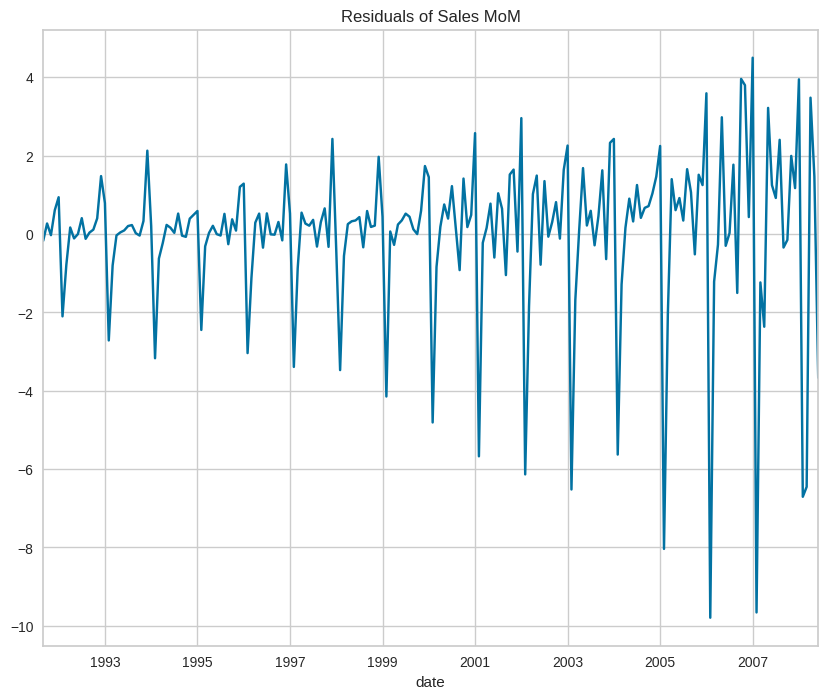

In [203]:
df_diff['residuals'] = results_AR.resid
df_diff.residuals[1:].plot(figsize=(10,8))
plt.title("Residuals of Sales MoM",size=12)
plt.show()

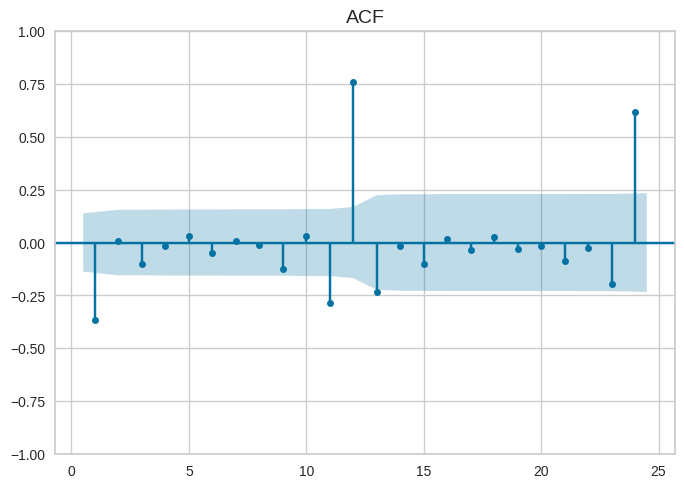

In [204]:
sgt.plot_acf(df_diff['sales'], lags = 24 ,zero = False)
plt.title("ACF", size = 14)
plt.show()

#### Several Basic Models for Comparison

The models will progress to more complex iterations... for instance, below we run several ARIMA configurations manually.

In [205]:
model_ar_1_i_1_ma_1 = ARIMA(df_diff['sales'], order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
model_ar_1_i_1_ma_2 = ARIMA(df_diff['sales'], order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df_diff['sales'], order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df_diff['sales'], order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df_diff['sales'], order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df_diff['sales'][1:], order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
model_ar_2_i_1_ma_2 = ARIMA(df_diff['sales'][1:], order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()

print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)
print("ARIMA(2,1,2):  \t LL = ", results_ar_2_i_1_ma_2.llf, "\t AIC = ", results_ar_2_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -438.1081039795682 	 AIC =  882.2162079591365
ARIMA(1,1,2):  	 LL =  -416.56074110793827 	 AIC =  841.1214822158765
ARIMA(1,1,3):  	 LL =  -426.96767134068295 	 AIC =  863.9353426813659
ARIMA(2,1,1):  	 LL =  -435.9440460902307 	 AIC =  879.8880921804614
ARIMA(3,1,1):  	 LL =  -432.8415960185066 	 AIC =  875.6831920370132
ARIMA(3,1,2):  	 LL =  -427.9007449296945 	 AIC =  867.801489859389
ARIMA(2,1,2):  	 LL =  -432.6785438799365 	 AIC =  875.357087759873


More on AIC here...[link text](https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced)

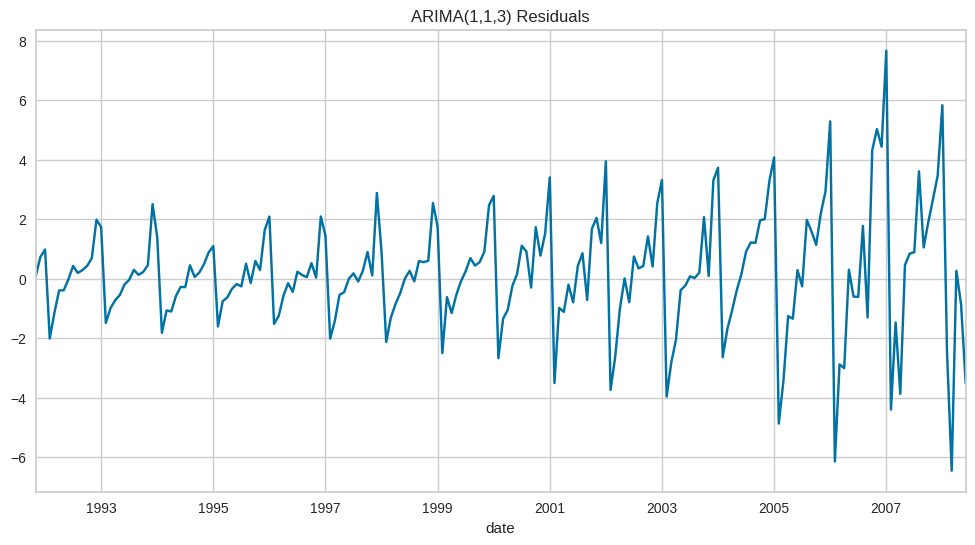

In [206]:
df_diff['resid_ARIMA(1,1,3)'] = results_ar_1_i_1_ma_3.resid
df_diff['resid_ARIMA(1,1,3)'][3:].plot(figsize=(12,6),title='ARIMA(1,1,3) Residuals');

Check for [Autocorrelation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

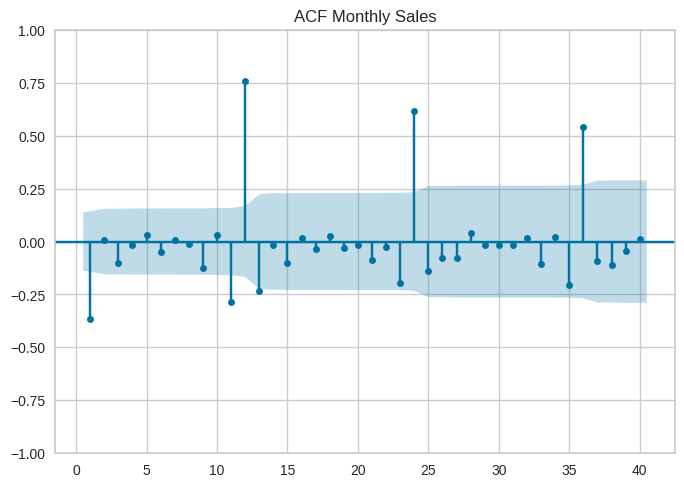

In [207]:
sgt.plot_acf(df_diff['sales'], lags = 40 ,zero = False)
plt.title("ACF Monthly Sales", size = 12)
plt.show()

In [208]:
print(results_ar_1_i_1_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  203
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -426.968
Date:                Wed, 05 Jul 2023   AIC                            863.935
Time:                        14:43:38   BIC                            880.477
Sample:                    08-01-1991   HQIC                           870.628
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9978      0.040    -24.758      0.000      -1.077      -0.919
ma.L1         -0.8422      0.117     -7.192      0.000      -1.072      -0.613
ma.L2         -0.9748      0.152     -6.431      0.0

## **Auto-ARIMA**


This function will run several seasonal ARIMA models and find the best configuration based on lowest AIC - take note of the R-squared when testing predictions against test data.

#### Data Prep for Auto-ARIMA

In [209]:
! pip install pmdarima

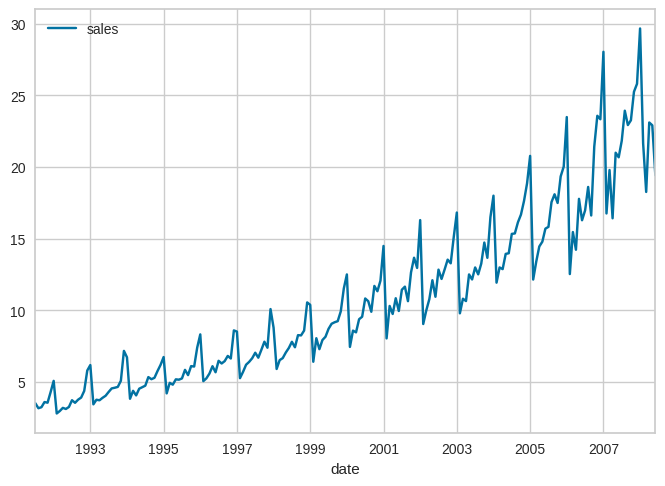

In [210]:
import pandas as pd
# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])

df=df.rename(columns = {'value':'sales'})
df.plot();

#### Test for Stationarity

In [211]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.01, False)

'False' means data is non-stationary so we must use the 'Integrated' step in the ARIMA settings

#### Test / Train Split

183 21


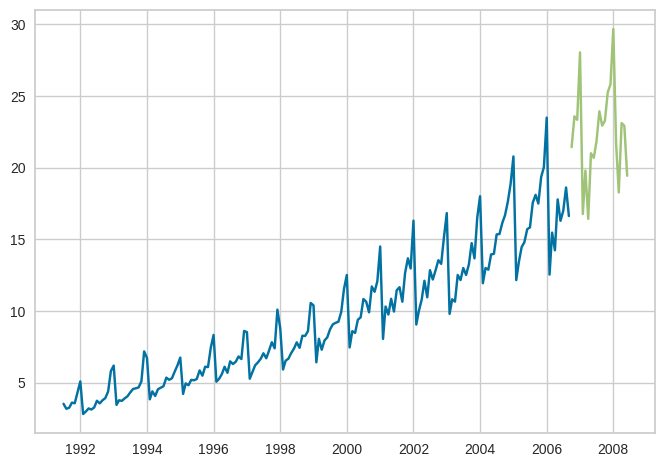

In [212]:
split = 0.90

size = int(len(df)*split)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
print(len(df_train), len(df_test))
plt.plot(df_train)
plt.plot(df_test);

#### Model Search Set-Up & Selection

In [213]:
from pmdarima.arima.auto import auto_arima

num_models_to_try = 20
max_p = 3               # max number of prior y-values to regress against
d = 1                   # number of times differencing is applied
max_q = 2               # max number of MA periods considered
m = 12                  # period for seasonal differencing

arima_model = auto_arima(df_train,start_p=0, d=1, start_q=0,
                         max_p=max_p, max_d=d, max_q=max_q, start_P=0,
                         D=1,start_Q=0,max_P=max_p, max_D=d,max_Q=max_q,
                         m=m, seasonal=True,error_action='warn',
                         trace=True,suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=num_models_to_try)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=445.910, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=366.571, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=347.637, Time=0.40 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=352.719, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=347.340, Time=0.94 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=350.969, Time=0.38 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=344.231, Time=1.92 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=342.811, Time=1.01 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=344.353, Time=1.25 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=346.221, Time=3.85 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=439.873, Time=0.65 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=336.925, Time=1.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=345.182, Time=0.42 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=338.764, Time=2.40 sec
 ARIMA(1,1,1)(2,1,1)[12]         

In [214]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  183
Model:             SARIMAX(3, 1, 2)x(2, 1, [], 12)   Log Likelihood                -156.487
Date:                             Wed, 05 Jul 2023   AIC                            330.973
Time:                                     14:46:23   BIC                            359.195
Sample:                                 07-01-1991   HQIC                           342.425
                                      - 09-01-2006                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0107      0.003      3.215      0.001       0.004       0.017
ar.L1         -0.8300      0.136     -6.088      0.000      -1.097      -0.563
ar.L2          0.3290      0.107      3.086      0.002       0.120       0.538
ar.L3          0.3764      0.070      5.397      0.000       0.240       0.513
ma.L1         -0.1601      0.153     -1.045      0.296      -0.460       0.140
ma.L2         -0.8194      0.141     -5.831      0.000      -1.095      -0.544
ar.S.L12      -0.2273      0.084     -2.717      0.007      -0.391      -0.063
ar.S.L24      -0.3380      0.078     -4.353      0.000      -0.490      -0.186
sigma2         0.3459      0.036      9.691      0.000       0.276       0.416
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 7.35
Prob(Q):                              0.89   Prob(JB):                         0.03
Heteroskedasticity (H):               5.48   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting with Best Model

In [215]:
num_periods_ahead = len(df_test)

prediction = pd.DataFrame(arima_model.predict(n_periods=num_periods_ahead),index=df_test.index)
prediction.columns = ['forecast_sales']
prediction

,forecast_sales
date,
2006-10-01,19.360064
2006-11-01,18.868178
2006-12-01,21.378209
2007-01-01,23.954563
2007-02-01,14.565114
2007-03-01,17.229875
2007-04-01,15.889986
2007-05-01,19.278631
2007-06-01,17.774337


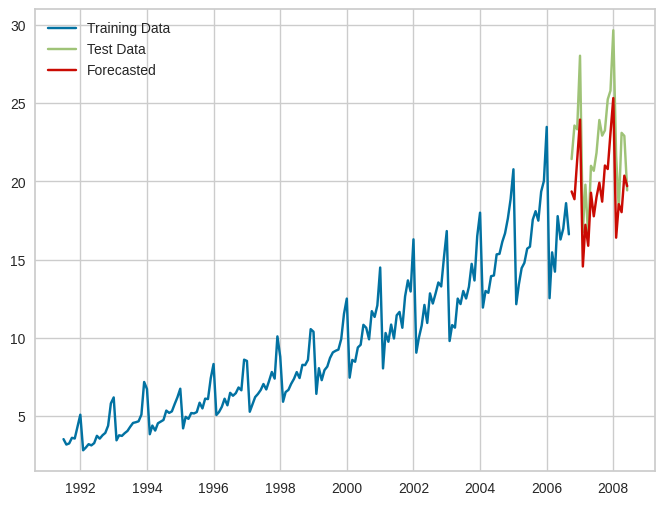

In [216]:
plt.figure(figsize=(8,6))
plt.plot(df_train, label='Training Data')
plt.plot(df_test, label='Test Data')
plt.plot(prediction, label='Forecasted')
plt.legend(loc='upper left');


In [217]:
from sklearn.metrics import r2_score

df_test['forecasted'] = prediction
r2_score(df_test['sales'], df_test['forecasted'])

-0.025060139754981225

## **Neural Network**

We can also look at a Time Series as a Supervised Machine Learning Process...

#### Data Prep for Supervised Machine Learning Neural Network Model

In [218]:
# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])

df=df.rename(columns = {'value':'sales'})

df_SML = pd.concat([df['sales'].shift(3), df['sales'].shift(2),
                    df['sales'].shift(1), df['sales']], axis=1)
df_SML.columns = ['t-3', 't-2', 't-1', 't']

df_SML = df_SML.iloc[3:]

df_SML = df_SML.reset_index(drop=True)
df_SML.head()

,t-3,t-2,t-1,t
0,3.526591,3.180891,3.252221,3.611003
1,3.180891,3.252221,3.611003,3.565869
2,3.252221,3.611003,3.565869,4.306371
3,3.611003,3.565869,4.306371,5.088335
4,3.565869,4.306371,5.088335,2.814520


In the table above we can use each previous value of y as a feature in a neural network for instance.

In [219]:
from sklearn.model_selection import train_test_split

X = df_SML.drop('t', axis=1)
y = df_SML['t']

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
print('Number of training instances:', len(X_train))
print('Number of test instances:', len(X_test))

Number of training instances: 180
Number of test instances: 21


In [220]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train), scaler.fit(X_test)

# # Transform the training data
# X_train = scaler.transform(X_train)
# # Transform the test data
# X_test = scaler.transform(X_test)


#### Model Set-Up

In [221]:
import tensorflow as tf

# Model Hyperparameters

neurons = 64
epochs = 50

model = tf.keras.Sequential([tf.keras.layers.Dense(neurons, activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(neurons/2, activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1, activation='linear')])

model.compile(loss = 'MSE',
              optimizer = 'adam',metrics=['accuracy'])


r = model.fit(X_train, y_train, epochs=epochs)


Epoch 1/50
6/6 [==============================] - 2s 6ms/step - loss: 146.6378 - accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 105.6776 - accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 65.9186 - accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 33.6252 - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 20.2730 - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 12.0683 - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 14.3202 - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 14.8767 - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 13.9496 - accuracy: 0.0000e+00
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 15.0751 - accuracy

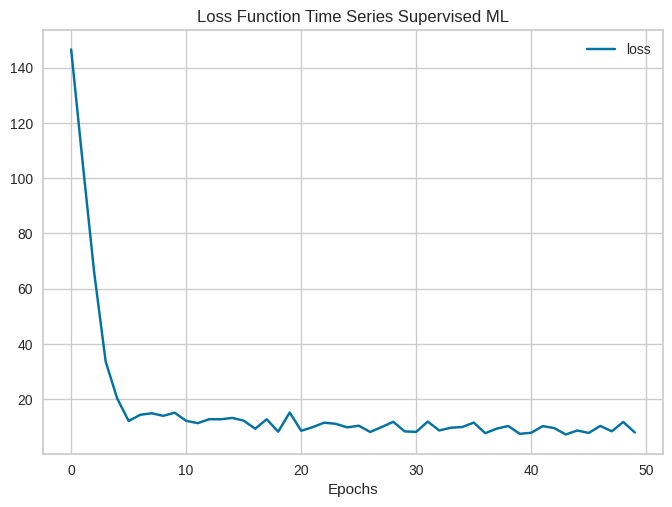

In [222]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss Function Time Series Supervised ML');

#### Model Outputs

MSE: 19.91403579711914
1/1 [==============================] - 0s 80ms/step


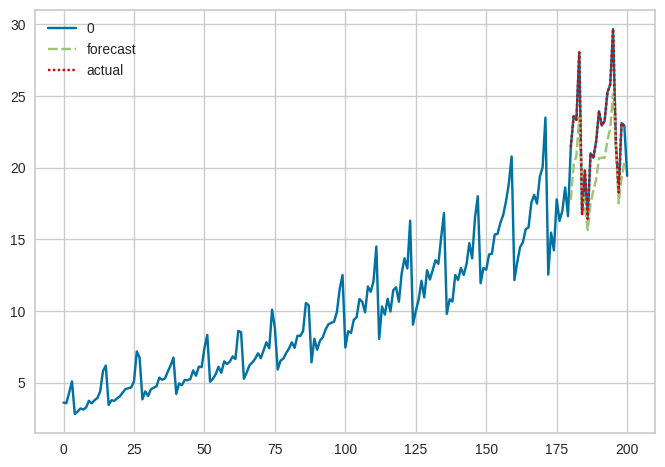

In [223]:
import seaborn as sns

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)  #run the data prep cells again if you get an error
print('MSE:', loss[0])

y_pred = model.predict(X_test)
y_pred = np.delete(y_pred, (0), axis=0)
y_test = y_test[:-1]
y_pred = y_pred.reshape(-1)

ML_comp = pd.DataFrame(data={'forecast': y_pred, 'actual': y_test})
NN_df = pd.concat([y,ML_comp], axis=0)

# Plot the DataFrame as a line graph
sns.lineplot(data=NN_df)
plt.show()

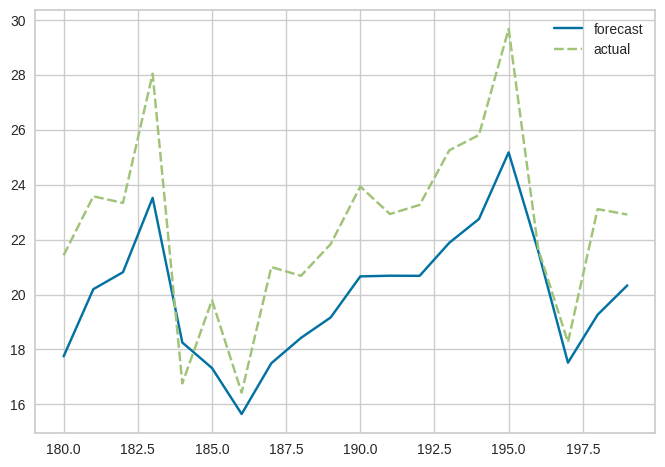

In [224]:
# Plot the DataFrame as a line graph, focusing on the predictions part
sns.lineplot(data=ML_comp)
plt.show()

In [225]:
# # Get the model weights
# weights = model.get_weights()

# # Print the model weights
# for weight in weights:
#     print(weight)

In [226]:
ML_comp.head()

,forecast,actual
180,17.750355,21.430241
181,20.193653,23.575517
182,20.812859,23.334206
183,23.516647,28.038383
184,18.251942,16.763869


Generate a random prediction from the test data and compare it to the actual label.

In [227]:
import random

X_test = X_test.reset_index(drop=True)

random_datapoint = random.randint(0, len(X_test))
features = X_test.iloc[random_datapoint-1]
act_y = y_test.iloc[random_datapoint-1]
input_data = tf.constant([features])
# Make a prediction
prediction = model.predict(input_data)

# Print the prediction
print(features)
print("Given the value of the previous 3-inputs, the model predicts:",
      prediction[0],"vs. an actual value of:", act_y);


1/1 [==============================] - 0s 32ms/step
t-3    18.264945
t-2    23.107677
t-1    22.912510
Name: 20, dtype: float64
Given the value of the previous 3-inputs, the model predicts: [20.33099] vs. an actual value of: 22.91251


## **Facebook's Prophet**

The following Time Series Forecasts are made using Facebook's Open Source Prophet Model on the Beer Production series...

#### Data Prep for Prophet

In [228]:
!pip install prophet

In [229]:
# prepare data for the prophet package
# data needs to be input in a specific format
import pandas as pd
from pandas import to_datetime
import datetime

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])

# Convert the date index into a column
df = df.reset_index(inplace=False)

df=df.rename(columns = {'value':'sales'})

df.head()

df['ds'] = df['date']
#df['ds']= to_datetime(df['ds'])
df['y'] = df['sales']
df = df.drop(columns=['sales','date'])

df = df.iloc[1:]
df.tail(3)

,ds,y
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


#### Fitting the Model & Outputs

In [230]:
from prophet import Prophet

model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmknalux/d55jzl9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmknalux/lhw4pa9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60130', 'data', 'file=/tmp/tmpqmknalux/d55jzl9j.json', 'init=/tmp/tmpqmknalux/lhw4pa9a.json', 'output', 'file=/tmp/tmpqmknalux/prophet_model_t6f5gvh/prophet_model-20230705144637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


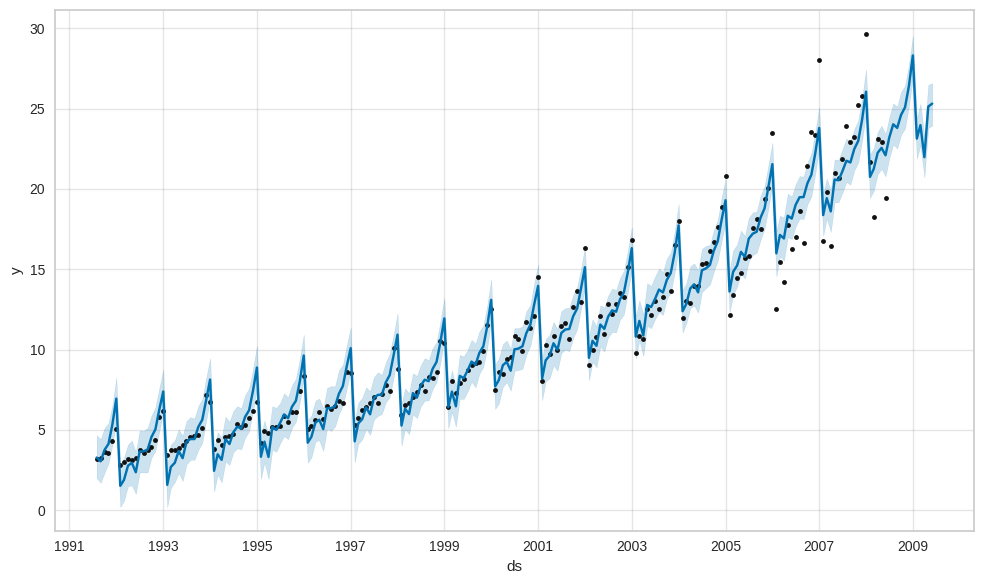

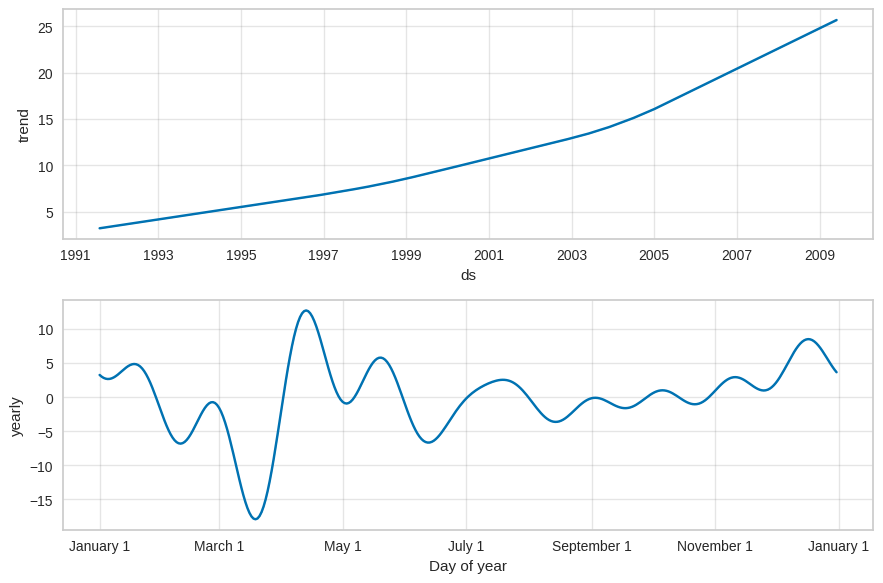

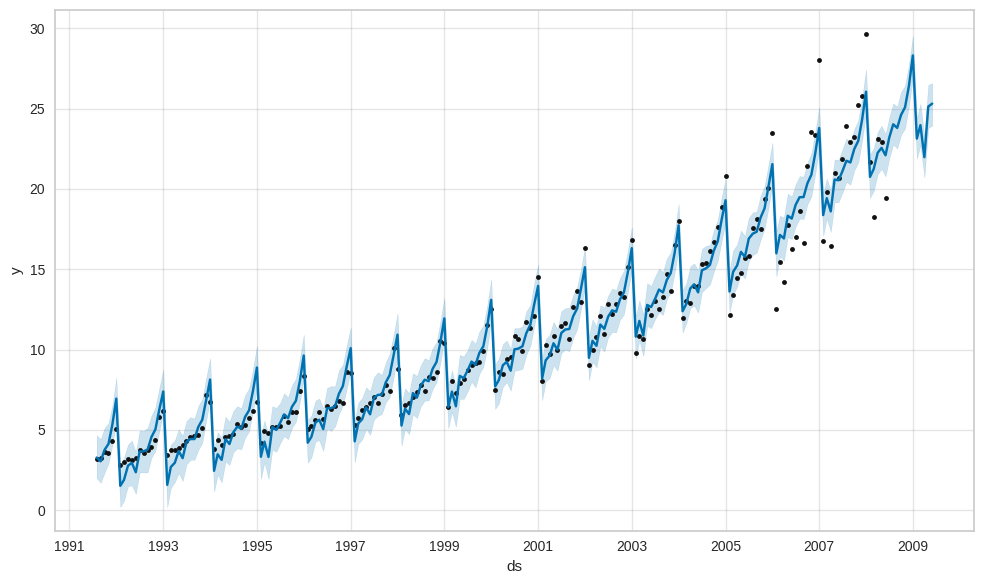

In [231]:
future = model.make_future_dataframe(12, freq='M')
forecast = model.predict(future)
#plot the model forecast chart with component charts in trend and seasonality
model.plot_components(forecast)
model.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmknalux/47ctxbiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmknalux/qo_sz3t6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94080', 'data', 'file=/tmp/tmpqmknalux/47ctxbiw.json', 'init=/tmp/tmpqmknalux/qo_sz3t6.json', 'output', 'file=/tmp/tmpqmknalux/prophet_model_mqqs4sy/prophet_model-20230705144639.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


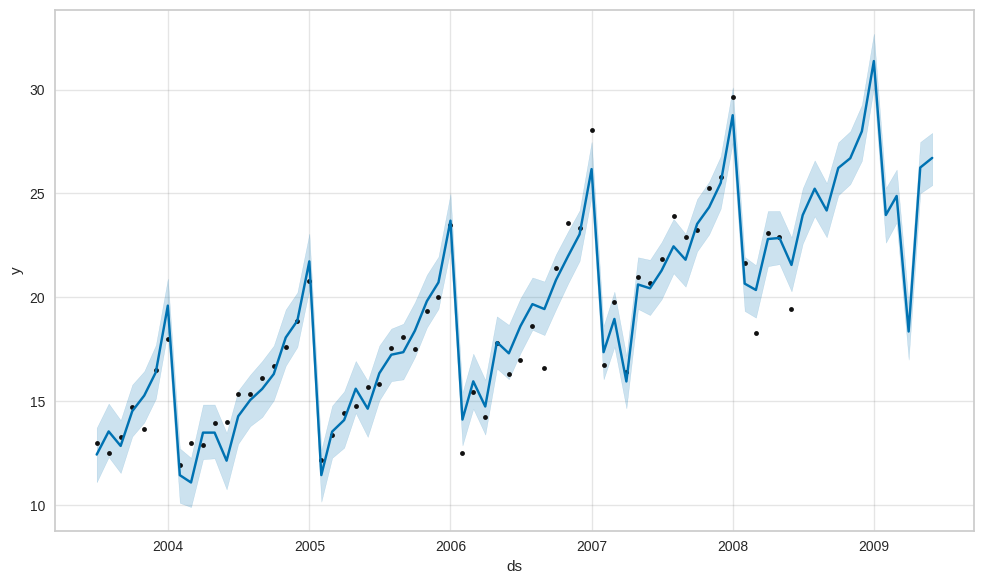

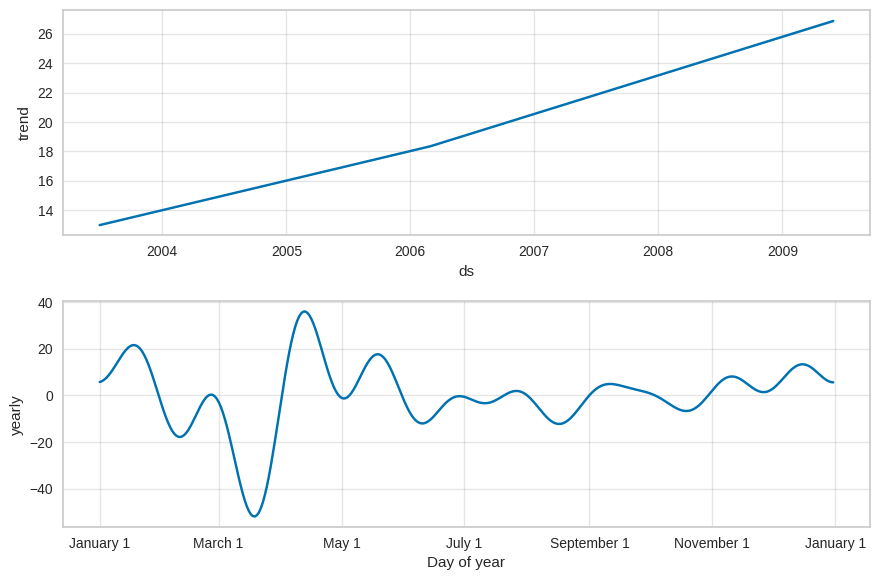

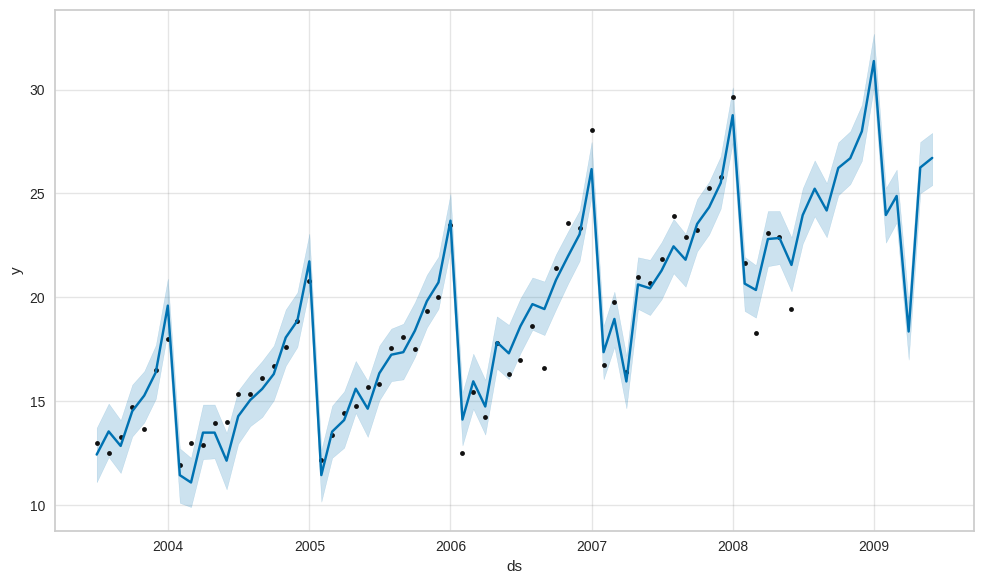

In [232]:
# on a smaller dataset

num_of_months_back = 60
num_of_months_forecast = 12

df = df.iloc[-num_of_months_back:]
model_small = Prophet()
model_small.fit(df)
future = model_small.make_future_dataframe(num_of_months_forecast, freq='M')
forecast = model_small.predict(future)
#plot the model forecast chart with component charts in trend and seasonality
model_small.plot_components(forecast)
model_small.plot(forecast)

## **PyCaret**

#### Data Prep for PyCaret

In [233]:
!pip install pycaret

In [234]:
# check installed version
import pandas as pd
import pycaret
pycaret.__version__

'3.0.4'

In [235]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])

# Convert the date index into a column
data = data.reset_index(inplace=False)

data = data.rename(columns = {'value':'sales', 'date':'Month'})

# select last 15 years of data
data = data.tail(180)


data['Month'] = pd.to_datetime(data['Month'])
# Reset the index
data = data.reset_index(inplace=False)

# extract month and year from dates
data['month'] = [i.month for i in data['Month']]
data['year'] = [i.year for i in data['Month']]
# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)

# # plot a moving average for the visual
data['MA12'] = data['sales'].rolling(12).mean()

import plotly.express as px
fig = px.line(data, x="Month", y=["sales", "MA12"], template = 'plotly_dark')
fig.show()



In [236]:
# drop unnecessary columns and re-arrange
data.drop(['Month', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'year', 'month', 'sales']]
data.head(9)

,Series,year,month,sales
0,1,1993,7,4.315566
1,2,1993,8,4.562185
2,3,1993,9,4.608662
3,4,1993,10,4.667851
4,5,1993,11,5.093841
5,6,1993,12,7.179962
6,7,1994,1,6.731473
7,8,1994,2,3.841278
8,9,1994,3,4.394076


In [237]:
# Manual split data into train-test set

split = 0.90
after = (max(data['year'] - min(data['year'])) * split) + min(data['year'])
print(after)

train = data[data['year'] < after]
test = data[data['year'] >= after]

train.shape, test.shape

2006.5


((162, 4), (18, 4))

#### Set Up Model Search

In [238]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test,
          target = 'sales', fold_strategy = 'timeseries',
          numeric_features = ['year', 'Series'], fold = 3,
          transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,sales
2,Target type,Regression
3,Original data shape,"(180, 4)"
4,Transformed data shape,"(180, 4)"
5,Transformed train set shape,"(162, 4)"
6,Transformed test set shape,"(18, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [239]:
best = compare_models(sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.3223,3.3621,1.7832,0.2887,0.1315,0.1110,0.0900
lr,Linear Regression,1.3211,3.3978,1.7964,0.2742,0.1325,0.1112,1.4567
ridge,Ridge Regression,1.3213,3.3983,1.7964,0.2743,0.1325,0.1112,0.0933
lar,Least Angle Regression,1.3213,3.3988,1.7966,0.2741,0.1326,0.1112,0.0967
huber,Huber Regressor,1.2246,3.7208,1.8950,0.1740,0.1400,0.1012,0.1333
omp,Orthogonal Matching Pursuit,1.5729,3.9722,1.9482,0.1460,0.1459,0.1357,0.1033
en,Elastic Net,2.1813,7.2391,2.6786,-1.0441,0.2314,0.1897,0.1067
dt,Decision Tree Regressor,2.3236,8.0659,2.6816,-0.5017,0.2074,0.1785,0.1067
rf,Random Forest Regressor,2.5697,10.0283,2.9924,-0.8937,0.2281,0.1933,0.6767
llar,Lasso Least Angle Regression,2.6311,10.0358,3.1561,-1.7384,0.2733,0.2236,0.0967


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [240]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2.6415,14.1230,3.7581,-0.1877,0.1579,0.1121


In [241]:
data.head()

,Series,year,month,sales
0,1,1993,7,4.315566
1,2,1993,8,4.562185
2,3,1993,9,4.608662
3,4,1993,10,4.667851
4,5,1993,11,5.093841


#### Additional Date Processing for Visuals

In [242]:
st_dates = [str(min(data['year'])),"-",str(data['month'][0]),"-01"]
en_dates = [str(max(data['year'])),'-',str(data['month'].iloc[-1]),'-01']
start_date = "".join(st_dates)
end_date = "".join(en_dates)

In [243]:
test_start_date = [str(min(test['year'])),"-",str(test['month'].iloc[0]),"-01"]
test_start_date = "".join(test_start_date)
test_end_date = [str(max(test['year'])),'-',str(test['month'].iloc[-1]),'-01']
test_end_date = "".join(end_date)
print(test_start_date, test_end_date)

2007-1-01 2008-6-01


#### Predictions and Outputs

In [244]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start=start_date, end = end_date, freq = 'MS')
predictions['sales'] = data['sales']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.1841,3.6905,1.9211,0.8876,0.1275,0.0960


In [245]:
predictions

,Series,year,month,sales,prediction_label,Date
0,1,1993,7,4.315566,4.592198,1993-07-01
1,2,1993,8,4.562185,4.709126,1993-08-01
2,3,1993,9,4.608662,4.828665,1993-09-01
3,4,1993,10,4.667851,4.950877,1993-10-01
4,5,1993,11,5.093841,5.075826,1993-11-01
...,...,...,...,...,...,...
175,176,2008,2,21.654285,20.452611,2008-02-01
176,177,2008,3,18.264945,20.943569,2008-03-01
177,178,2008,4,23.107677,21.446528,2008-04-01
178,179,2008,5,22.912510,21.961799,2008-05-01


In [246]:
# line plot
fig = px.line(predictions, x='Date', y=["sales",'prediction_label'], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0=test_start_date , x1=test_end_date, fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [247]:
final_best = finalize_model(best)
# Evaluate the model
evaluate_model(final_best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Forecasting on Best Model

In [248]:
months_ahead = 24

print(end_date)

2008-6-01


In [249]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

date_1 = datetime.strptime(end_date, '%Y-%m-%d')
result = date_1 + relativedelta(months=+1)
end_fc_date = result + relativedelta(months=+months_ahead)
start_fc_date = result.strftime('%Y-%m-%d')
end_fc_date = end_fc_date.strftime('%Y-%m-%d')
print(start_fc_date)
print(end_fc_date)

future_dates = pd.date_range(start = start_fc_date, end = end_fc_date, freq = 'MS')
future_df = pd.DataFrame()
future_df['month'] = [i.month for i in future_dates]
future_df['year'] = [i.year for i in future_dates]
future_df['Series'] = np.arange(max(data['Series']),(max(data['Series'])+len(future_dates)))
future_df.tail()

2008-07-01
2010-07-01


,month,year,Series
20,3,2010,200
21,4,2010,201
22,5,2010,202
23,6,2010,203
24,7,2010,204


In [250]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.tail()

,month,year,Series,prediction_label
20,3,2010,200,26.749313
21,4,2010,201,27.393499
22,5,2010,202,28.054249
23,6,2010,203,28.732029
24,7,2010,204,29.427321


In [251]:
# show predictions

concat_df = pd.concat([data,predictions_future], axis=0)
concat_df_i = pd.date_range(start=start_date, end = end_fc_date, freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["sales", "prediction_label"], template = 'plotly_dark')
fig.show()